## About Dataset


### Context
A fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.

### Data Description</br>
**7043 observations with 33 variables** 

**CustomerID:** A unique ID that identifies each customer.

**Count:** A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

**Country:** The country of the customer’s primary residence.

**State:** The state of the customer’s primary residence.

**City:** The city of the customer’s primary residence.

**Zip Code:** The zip code of the customer’s primary residence.

**Lat Long:** The combined latitude and longitude of the customer’s primary residence.

**Latitude:** The latitude of the customer’s primary residence.

**Longitude:** The longitude of the customer’s primary residence.

**Gender:** The customer’s gender: Male, Female

**Senior Citizen:** Indicates if the customer is 65 or older: Yes, No

**Partner:** Indicate if the customer has a partner: Yes, No

**Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**Tenure Months:** Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

**Phone Service:** Indicates if the customer subscribes to home phone service with the company: Yes, No

**Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**Internet Service:** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

**Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**Device Protection:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

**Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract:** Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing:** Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method:** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge:** Indicates the customer’s current total monthly charge for all their services from the company.

**Total Charges:** Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Churn Label:** Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

**Churn Value:** 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

**Churn Score:** A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

**CLTV:** Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

**Churn Reason:** A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [937]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [938]:
sns.set_theme(style= 'darkgrid')

In [939]:
customer_churn = pd.read_excel('Telco_customer_churn.xlsx')

In [940]:
customer_churn.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [941]:
customer_churn.sample(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
5008,5939-XAIXZ,1,United States,California,Birds Landing,94512,"38.140719, -121.838298",38.140719,-121.838298,Female,...,Month-to-month,Yes,Mailed check,56.10,1033.9,No,0,27,3367,NaN
5618,7136-IHZJA,1,United States,California,Santa Fe Springs,90670,"33.933565, -118.062611",33.933565,-118.062611,Female,...,Month-to-month,Yes,Mailed check,71.35,2847.2,No,0,43,5807,NaN
4229,8564-LDKFL,1,United States,California,Big Bar,96010,"40.775272, -123.287414",40.775272,-123.287414,Male,...,One year,Yes,Bank transfer (automatic),106.00,4178.65,No,0,77,5118,NaN
2572,0811-GSDTP,1,United States,California,Alameda,94502,"37.724817, -122.224363",37.724817,-122.224363,Female,...,Month-to-month,No,Electronic check,30.15,382.2,No,0,22,3540,NaN
666,0407-BDJKB,1,United States,California,San Francisco,94114,"37.758085, -122.434801",37.758085,-122.434801,Male,...,Month-to-month,Yes,Electronic check,95.75,5742.9,Yes,1,88,4129,Service dissatisfaction


In [942]:
customer_churn.columns = customer_churn.columns.str.lower().str.replace(' ', '_')

In [943]:
customer_churn.sample(5)

,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,gender,...,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
6363,8654-DHAOW,1,United States,California,Burson,95225,"38.183918, -120.898817",38.183918,-120.898817,Female,...,Month-to-month,No,Mailed check,54.15,101.65,No,0,27,3527,NaN
257,1989-PRJHP,1,United States,California,Pleasanton,94588,"37.685052, -121.912061",37.685052,-121.912061,Male,...,Month-to-month,Yes,Electronic check,75.50,1893.95,Yes,1,65,2377,Competitor had better devices
2202,2937-FTHUR,1,United States,California,Cedar Glen,92321,"34.255203, -117.175654",34.255203,-117.175654,Female,...,Month-to-month,No,Electronic check,64.80,1166.7,No,0,37,2466,NaN
1200,4547-KQRTM,1,United States,California,Eldridge,95431,"38.348884, -122.51699",38.348884,-122.516990,Female,...,Month-to-month,Yes,Bank transfer (automatic),80.05,830.7,Yes,1,76,3740,Competitor offered higher download speeds
3819,0907-HQNTS,1,United States,California,Pittsburg,94565,"38.006047, -121.916834",38.006047,-121.916834,Female,...,Two year,Yes,Credit card (automatic),113.00,7987.6,No,0,47,4588,NaN


In [944]:
customer_churn.columns

Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
       'churn_score', 'cltv', 'churn_reason'],
      dtype='object')

In [945]:
customer_churn.shape

(7043, 33)

In [946]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         7043 non-null   object 
 1   count              7043 non-null   int64  
 2   country            7043 non-null   object 
 3   state              7043 non-null   object 
 4   city               7043 non-null   object 
 5   zip_code           7043 non-null   int64  
 6   lat_long           7043 non-null   object 
 7   latitude           7043 non-null   float64
 8   longitude          7043 non-null   float64
 9   gender             7043 non-null   object 
 10  senior_citizen     7043 non-null   object 
 11  partner            7043 non-null   object 
 12  dependents         7043 non-null   object 
 13  tenure_months      7043 non-null   int64  
 14  phone_service      7043 non-null   object 
 15  multiple_lines     7043 non-null   object 
 16  internet_service   7043 

In [947]:
# customer_churn.gender = (customer_churn.gender == 'Male').astype('int')
# customer_churn.senior_citizen = (customer_churn.senior_citizen == 'Male').astype('int')

In [948]:
customer_churn.head()

,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,gender,...,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [949]:
customer_churn.isnull().sum().value_counts(ascending=False)

0       32
5174     1
Name: count, dtype: int64

In [950]:
customer_churn.isnull().sum()

customerid              0
count                   0
country                 0
state                   0
city                    0
zip_code                0
lat_long                0
latitude                0
longitude               0
gender                  0
senior_citizen          0
partner                 0
dependents              0
tenure_months           0
phone_service           0
multiple_lines          0
internet_service        0
online_security         0
online_backup           0
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
contract                0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
churn_label             0
churn_value             0
churn_score             0
cltv                    0
churn_reason         5174
dtype: int64

In [951]:
customer_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
count,7043.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
zip_code,7043.0,93521.964646,1865.794555,90001.000000,92102.000000,93552.000000,95351.000000,96161.000000
latitude,7043.0,36.282441,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
longitude,7043.0,-119.798880,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
tenure_months,7043.0,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
monthly_charges,7043.0,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
churn_value,7043.0,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000
churn_score,7043.0,58.699418,21.525131,5.000000,40.000000,61.000000,75.000000,100.000000
cltv,7043.0,4400.295755,1183.057152,2003.000000,3469.000000,4527.000000,5380.500000,6500.000000


In [952]:
customer_churn.columns

Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
       'churn_score', 'cltv', 'churn_reason'],
      dtype='object')

In [953]:
redundants = ['customerid','country', 'state', 'city', 'count', 'zip_code', 'lat_long', 'latitude', 
              'longitude', 'partner', 'dependents', 'churn_label', 'churn_reason']

customer_churn.drop(redundants, axis = 1, inplace=True)

In [954]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   senior_citizen     7043 non-null   object 
 2   tenure_months      7043 non-null   int64  
 3   phone_service      7043 non-null   object 
 4   multiple_lines     7043 non-null   object 
 5   internet_service   7043 non-null   object 
 6   online_security    7043 non-null   object 
 7   online_backup      7043 non-null   object 
 8   device_protection  7043 non-null   object 
 9   tech_support       7043 non-null   object 
 10  streaming_tv       7043 non-null   object 
 11  streaming_movies   7043 non-null   object 
 12  contract           7043 non-null   object 
 13  paperless_billing  7043 non-null   object 
 14  payment_method     7043 non-null   object 
 15  monthly_charges    7043 non-null   float64
 16  total_charges      7043 

In [955]:
remove_charges = customer_churn[customer_churn['total_charges']==' ']
remove_charges

,gender,senior_citizen,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_value,churn_score,cltv
2234,Female,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,36,2578
2438,Male,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0,68,5504
2568,Female,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0,45,2048
2667,Male,No,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0,48,4950
2856,Female,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0,30,4740
4331,Male,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,53,2019
4687,Male,No,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,49,2299
5104,Female,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0,27,3763
5719,Male,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,69,4890
6772,Female,No,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0,44,2342


In [956]:
customer_churn.drop(customer_churn[customer_churn['total_charges']==' '].index, inplace=True)

In [957]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7032 non-null   object 
 1   senior_citizen     7032 non-null   object 
 2   tenure_months      7032 non-null   int64  
 3   phone_service      7032 non-null   object 
 4   multiple_lines     7032 non-null   object 
 5   internet_service   7032 non-null   object 
 6   online_security    7032 non-null   object 
 7   online_backup      7032 non-null   object 
 8   device_protection  7032 non-null   object 
 9   tech_support       7032 non-null   object 
 10  streaming_tv       7032 non-null   object 
 11  streaming_movies   7032 non-null   object 
 12  contract           7032 non-null   object 
 13  paperless_billing  7032 non-null   object 
 14  payment_method     7032 non-null   object 
 15  monthly_charges    7032 non-null   float64
 16  total_charges      7032 non-n

In [958]:
customer_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure_months,7032.0,32.421786,24.545260,1.00,9.0000,29.00,55.0000,72.00
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.35,89.8625,118.75
churn_value,7032.0,0.265785,0.441782,0.00,0.0000,0.00,1.0000,1.00
churn_score,7032.0,58.715301,21.531321,5.00,40.0000,61.00,75.0000,100.00
cltv,7032.0,4401.445108,1182.414266,2003.00,3469.7500,4527.50,5381.0000,6500.00


In [959]:
# customer_churn['total_charges'].replace(' ', 0, inplace=True)

In [960]:
customer_churn['total_charges'] = customer_churn['total_charges'].astype(float)

In [961]:
customer_churn.reset_index()

,index,gender,senior_citizen,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_value,churn_score,cltv
0,0,Male,No,2,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239
1,1,Female,No,2,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701
2,2,Female,No,8,Yes,Yes,Fiber optic,No,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372
3,3,Female,No,28,Yes,Yes,Fiber optic,No,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003
4,4,Male,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,Female,No,72,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,45,5306
7028,7039,Male,No,24,Yes,Yes,DSL,Yes,No,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,59,2140
7029,7040,Female,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,71,5560
7030,7041,Female,No,11,No,No phone service,DSL,Yes,No,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,59,2793


In [962]:
categorical_columns = customer_churn.select_dtypes(['object']).columns
numerical_columns = customer_churn.select_dtypes(include=np.number).columns

In [963]:
customer_churn[categorical_columns]

,gender,senior_citizen,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method
0,Male,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
1,Female,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
2,Female,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
3,Female,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
4,Male,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic)
7039,Male,No,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7040,Female,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7041,Female,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [964]:
customer_churn.head()

,gender,senior_citizen,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_value,churn_score,cltv
0,Male,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239
1,Female,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701
2,Female,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372
3,Female,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003
4,Male,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340


In [965]:
customer_churn[numerical_columns]

,tenure_months,monthly_charges,total_charges,churn_value,churn_score,cltv
0,2,53.85,108.15,1,86,3239
1,2,70.70,151.65,1,67,2701
2,8,99.65,820.50,1,86,5372
3,28,104.80,3046.05,1,84,5003
4,49,103.70,5036.30,1,89,5340
...,...,...,...,...,...,...
7038,72,21.15,1419.40,0,45,5306
7039,24,84.80,1990.50,0,59,2140
7040,72,103.20,7362.90,0,71,5560
7041,11,29.60,346.45,0,59,2793


In [966]:
categorical_columns

Index(['gender', 'senior_citizen', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method'],
      dtype='object')

In [967]:
numerical_columns

Index(['tenure_months', 'monthly_charges', 'total_charges', 'churn_value',
       'churn_score', 'cltv'],
      dtype='object')

In [968]:
correlation = customer_churn.corr(numeric_only=True)
correlation

,tenure_months,monthly_charges,total_charges,churn_value,churn_score,cltv
tenure_months,1.000000,0.246862,0.825880,-0.354049,-0.226379,0.396188
monthly_charges,0.246862,1.000000,0.651065,0.192858,0.133556,0.098565
total_charges,0.825880,0.651065,1.000000,-0.199484,-0.124312,0.341837
churn_value,-0.354049,0.192858,-0.199484,1.000000,0.664970,-0.128253
churn_score,-0.226379,0.133556,-0.124312,0.664970,1.000000,-0.080837
cltv,0.396188,0.098565,0.341837,-0.128253,-0.080837,1.000000


<Axes: >

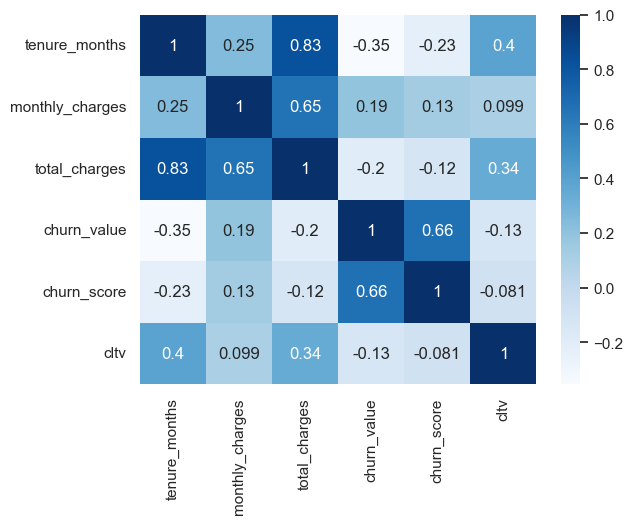

In [969]:
sns.heatmap(correlation, annot=True, cmap="Blues")

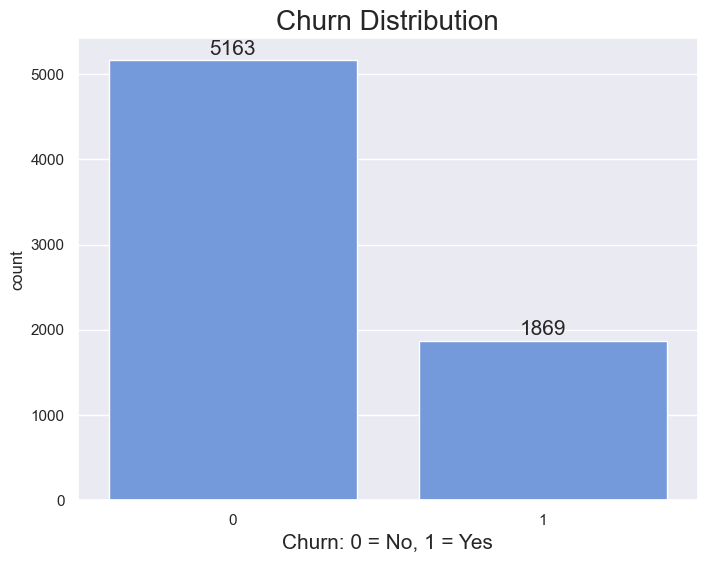

In [970]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x="churn_value", data=customer_churn,color='cornflowerblue')
plt.xlabel('Churn: 0 = No, 1 = Yes', size=15)
plt.title('Churn Distribution', size = 20)
for i in ax.patches:
    ax.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2,
                 i.get_height()), ha='center', va='center',
                 size=15, xytext=(0, 8),
                 textcoords='offset points');

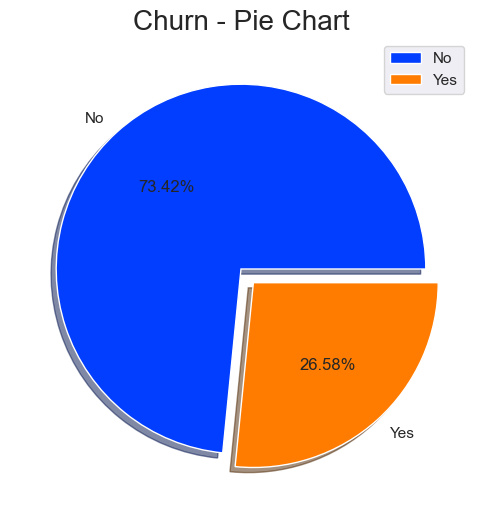

In [971]:
# fig, ax = plt.subplots()
# ax.pie("churn_value", labels=customer_churn, autopct='%1.1f%%')



plt.figure(figsize=(8,6))
explode = [0,0.1]
palette_color = sns.color_palette('bright')
plt.pie(x= customer_churn.churn_value.value_counts(), labels = ['No', 'Yes'], 
        autopct='%1.2f%%', shadow=True, explode = explode, colors=palette_color)
plt.title('Churn - Pie Chart', size = 20)
plt.legend()
plt.show()



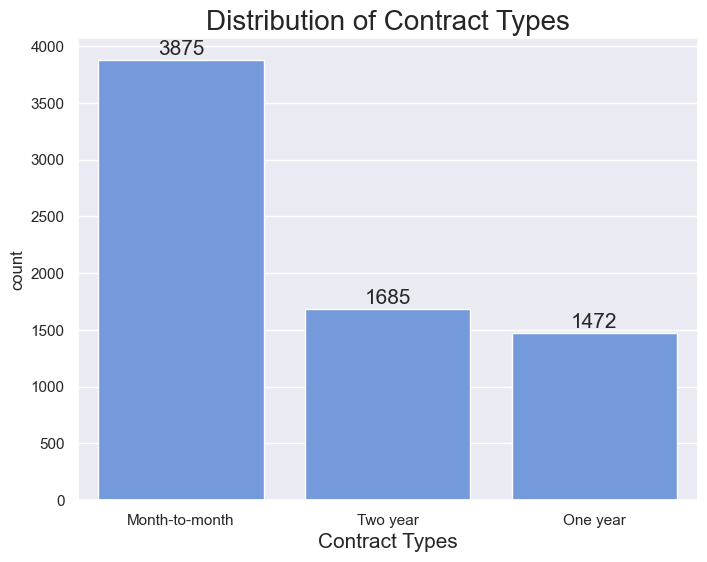

In [972]:
plt.figure(figsize=(8,6))

ax=sns.countplot(x='contract', data=customer_churn,color='cornflowerblue')
plt.xlabel('Contract Types', size = 15)
plt.title('Distribution of Contract Types', size = 20)
for i in ax.patches:
    ax.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2,
                 i.get_height()), ha='center', va='center',
                 size=15, xytext=(0, 8),
                 textcoords='offset points');

In [973]:
gender_proportion = pd.DataFrame(customer_churn['gender'].value_counts(normalize=True))

contract_proportion = pd.DataFrame(customer_churn['contract'].value_counts(normalize=True))

internet_service_proportion = pd.DataFrame(customer_churn['internet_service'].value_counts(normalize=True))

In [974]:
gender_proportion

,proportion
gender,
Male,0.504693
Female,0.495307


In [975]:
contract_proportion

,proportion
contract,
Month-to-month,0.551052
Two year,0.239619
One year,0.209329


In [976]:
internet_service_proportion

,proportion
internet_service,
Fiber optic,0.440273
DSL,0.343572
No,0.216155


In [977]:
churn_rate = pd.DataFrame(customer_churn['churn_value'].value_counts(normalize=True))

In [978]:
churn_rate

,proportion
churn_value,
0,0.734215
1,0.265785


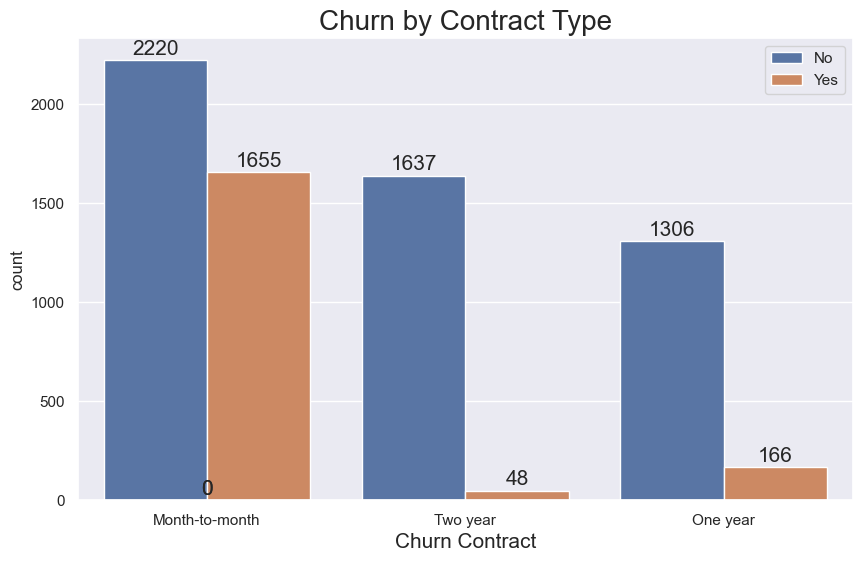

In [979]:
# Relationship between Contract Type and Churn
plt.figure(figsize=(10,6))

ax=sns.countplot(x='contract', hue='churn_value', data=customer_churn)
plt.xlabel('Churn Contract', size=15)
plt.legend(["No", "Yes"])
plt.title('Churn by Contract Type', size = 20)

for i in ax.patches:
    ax.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2,
                 i.get_height()), ha='center', va='center',
                 size=15, xytext=(0, 8),
                 textcoords='offset points');

In [980]:
# plt.pie(x="churn_value", data=customer_churn)

In [981]:
pd.DataFrame(customer_churn.churn_value.value_counts())

,count
churn_value,
0,5163
1,1869


### ❖	Feature Distribution: </br>
♦	For categorical features (e.g., Contract, PaymentMethod), use bar plots or count plots to visualize how different categories are distributed.</br>
♦	For numerical features (e.g., MonthlyCharges, TotalCharges, Tenure), use histograms or box plots to understand the distribution, central tendency, and any outliers.


In [982]:
customer_churn[categorical_columns]

,gender,senior_citizen,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method
0,Male,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
1,Female,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
2,Female,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
3,Female,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
4,Male,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic)
7039,Male,No,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7040,Female,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7041,Female,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [983]:
customer_churn[numerical_columns]

,tenure_months,monthly_charges,total_charges,churn_value,churn_score,cltv
0,2,53.85,108.15,1,86,3239
1,2,70.70,151.65,1,67,2701
2,8,99.65,820.50,1,86,5372
3,28,104.80,3046.05,1,84,5003
4,49,103.70,5036.30,1,89,5340
...,...,...,...,...,...,...
7038,72,21.15,1419.40,0,45,5306
7039,24,84.80,1990.50,0,59,2140
7040,72,103.20,7362.90,0,71,5560
7041,11,29.60,346.45,0,59,2793


In [984]:
categorical_columns

Index(['gender', 'senior_citizen', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method'],
      dtype='object')

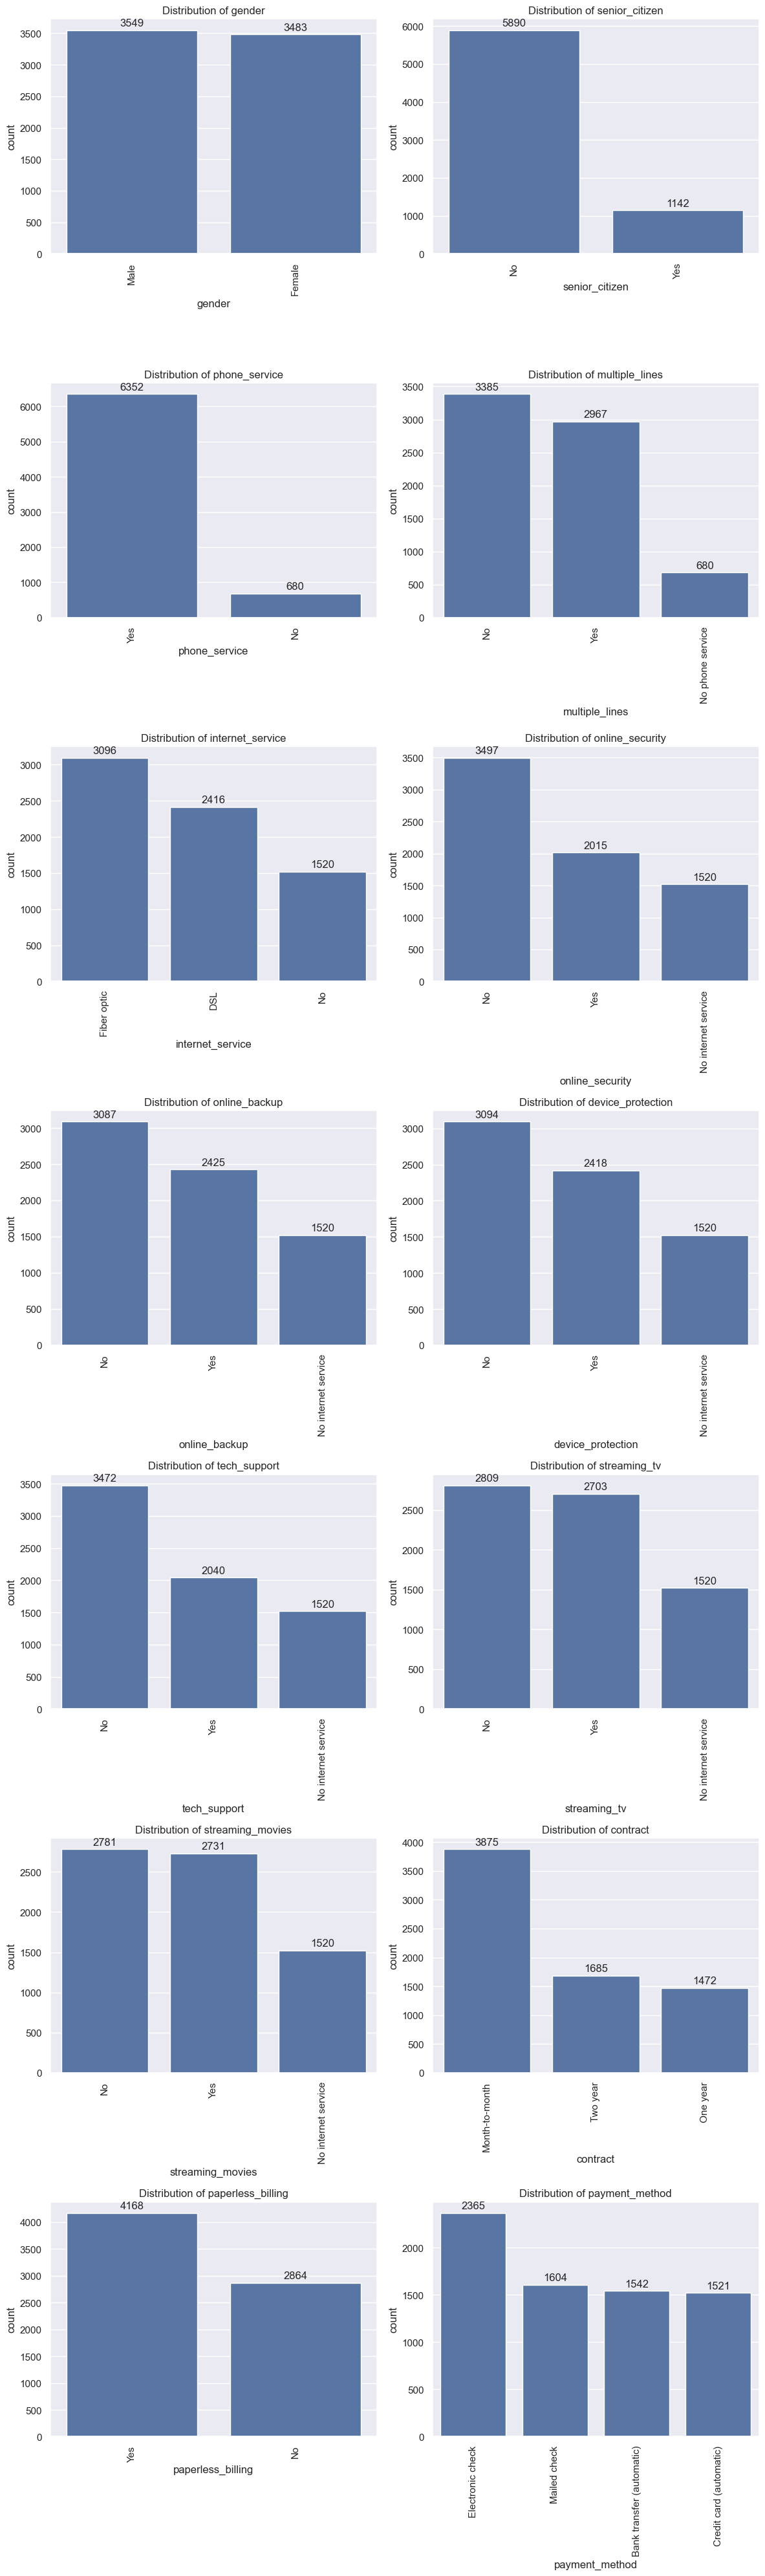

In [985]:
fig, axes = plt.subplots(7, 2, figsize=(12, 40))
for i, col, in enumerate(categorical_columns):
    ax = axes[i//2, i%2]
    sns.countplot(ax = ax, x = col, data = customer_churn, order = customer_churn[col].value_counts().index)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel(col)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    for i in ax.patches:
        ax.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2,
                 i.get_height()), ha='center', va='center',
                 size=12, xytext=(0, 8),
                 textcoords='offset points');

plt.tight_layout()
plt.show()

tenure_months 
Skew = 0.23773083190513133


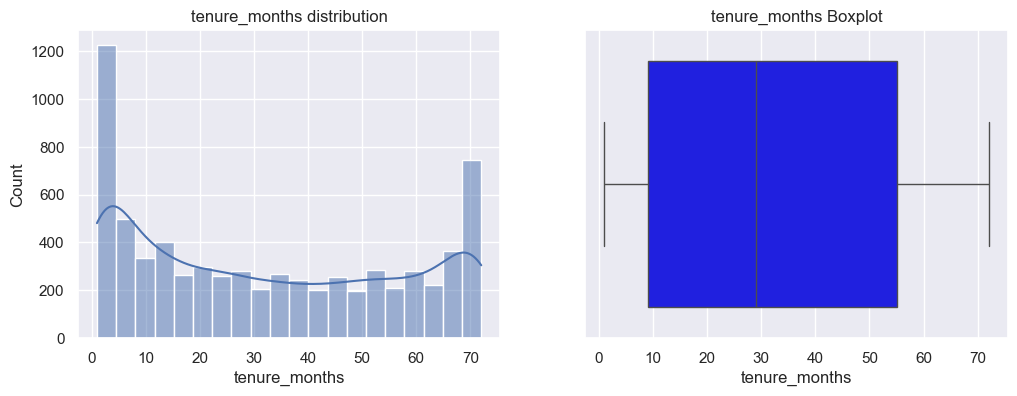

monthly_charges 
Skew = -0.22210292770166232


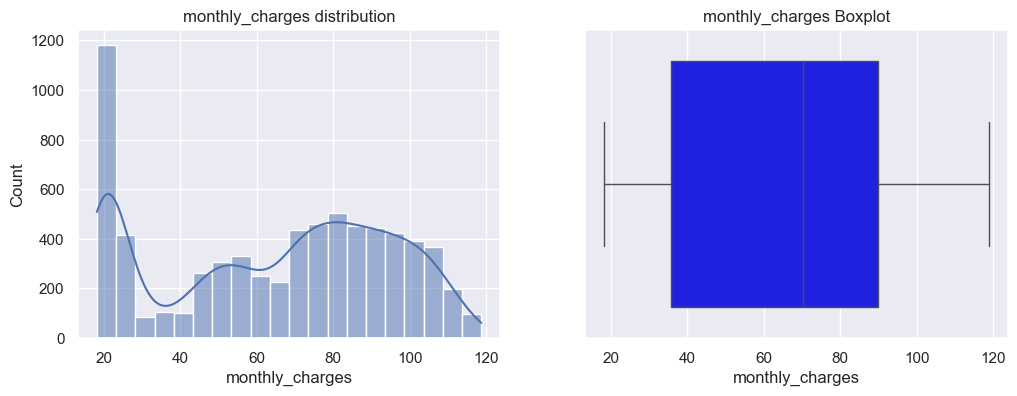

total_charges 
Skew = 0.9616424997242513


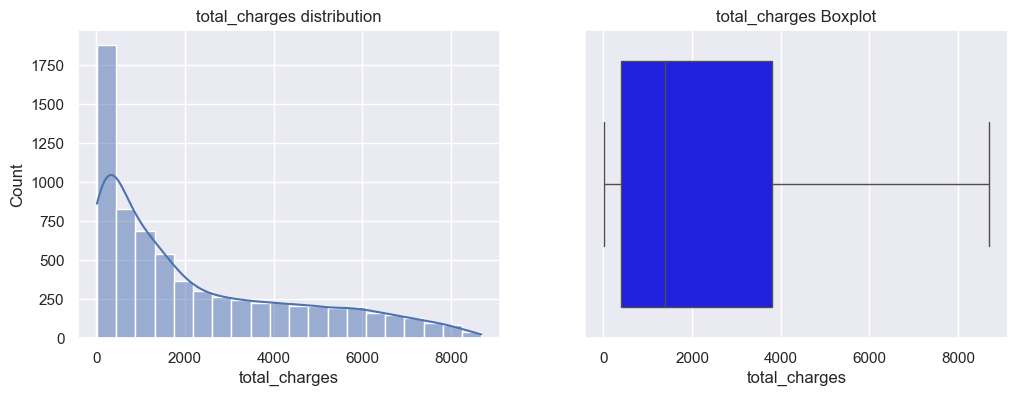

churn_value 
Skew = 1.060621768854348


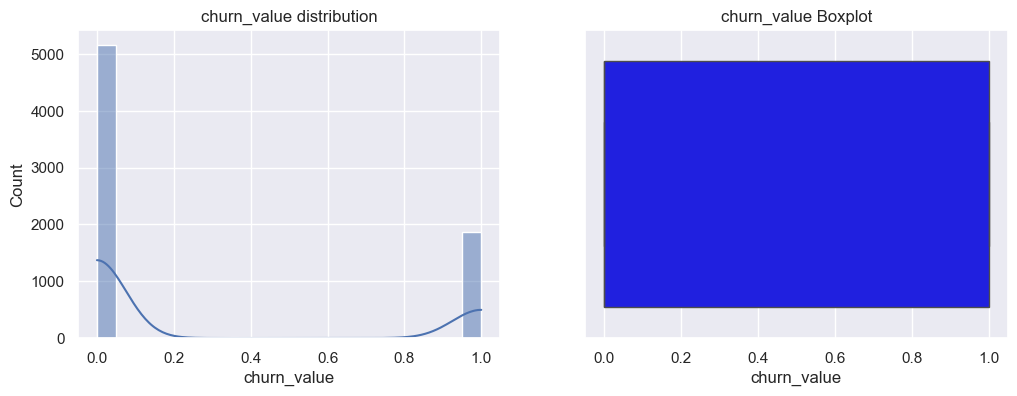

churn_score 
Skew = -0.09107471235065685


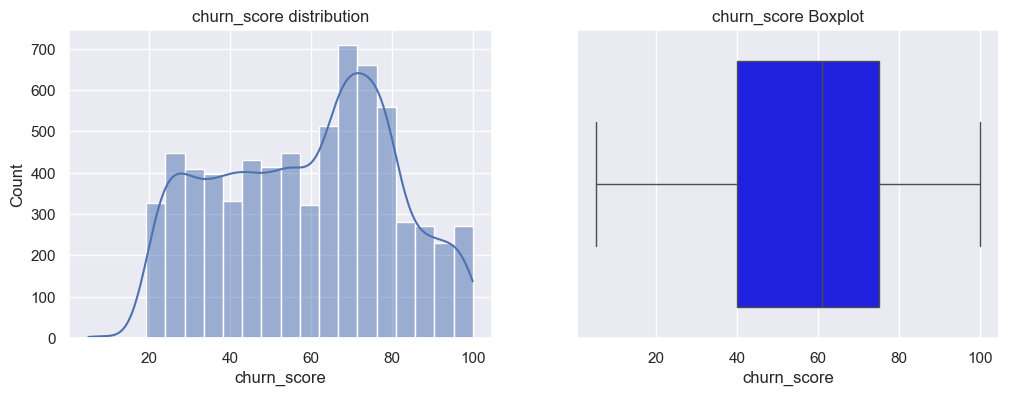

cltv 
Skew = -0.3113273648048447


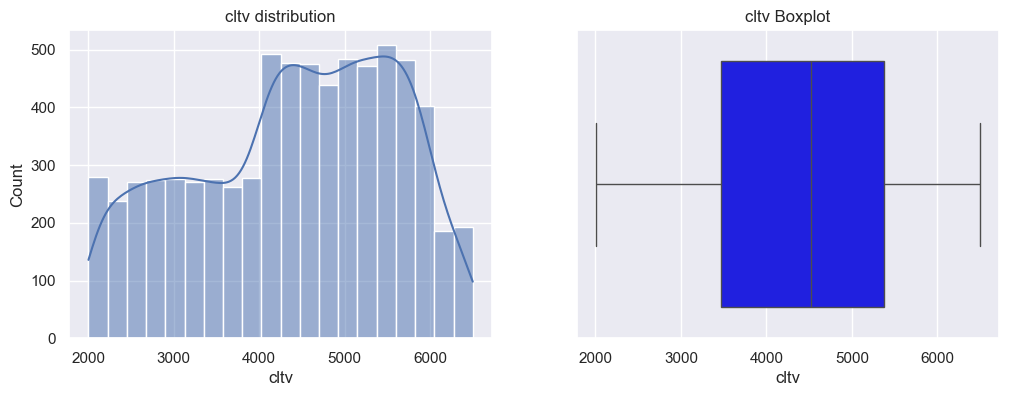

In [986]:
for cols in numerical_columns:
    skewness = customer_churn[cols].skew()
    print(f'{cols} \nSkew = {skewness}')
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    sns.histplot(customer_churn[cols], kde=True, bins=20)
    plt.title(f'{cols} distribution')
    plt.xlabel(cols)
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=customer_churn[cols], color= 'blue')
    plt.title(f'{cols} Boxplot')
    plt.xlabel(cols)
    plt.show()
    plt.show()

### ❖	Churn Correlation:</br>
♦	Use box plots or violin plots to visualize the relationship between numerical features and churn </br>
♦	For categorical features, use stacked bar plots or grouped bar charts to compare churn rates across categories 


In [987]:
numerical_columns

Index(['tenure_months', 'monthly_charges', 'total_charges', 'churn_value',
       'churn_score', 'cltv'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

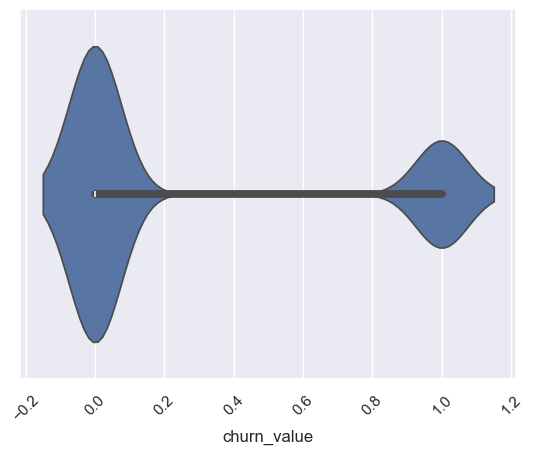

In [988]:
# sns.set_theme(rc={"axes.facecolor":"#e6e6e6",
#             "axes.grid":False,
#             'axes.labelsize':30,
#             'figure.figsize':(5.0, 6.0),
#             'xtick.labelsize':25,
#             'ytick.labelsize':20})


sns.violinplot(data=customer_churn,
               x = 'churn_value')
                #    y = 'Duration',
                #    palette = 'spectral',
            #    order = sorted(customer_churn[numerical_columns]),
            #    notch=True)
plt.xticks(rotation=45)
# l = plt.xlabel('')
# plt.ylabel('Duration (min)')
# plt.text(4.85,200, "Violin Plot", fontsize = 95, color="black", fontstyle='italic')
plt.show

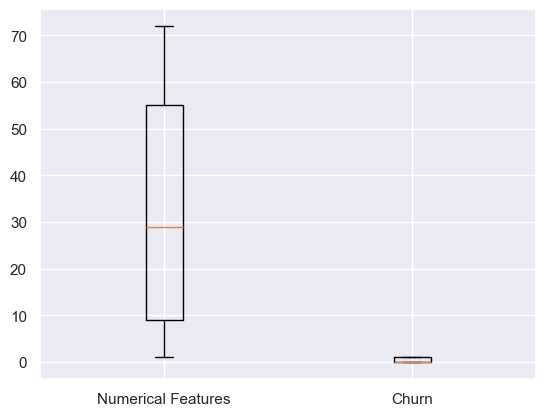

In [989]:
fig, ax = plt.subplots()
ax.boxplot([customer_churn["tenure_months"], customer_churn["churn_value"]])
ax.set_xticklabels(["Numerical Features", "Churn"])
# ax.set_ylabel("col")
plt.show()

In [990]:
# plt.figure(figsize=(13, 17))
# sns.pairplot(data=df.drop(['Kilometers_Driven', 'Price'], axis=1))
# plt.show()

<Axes: xlabel='churn_value'>

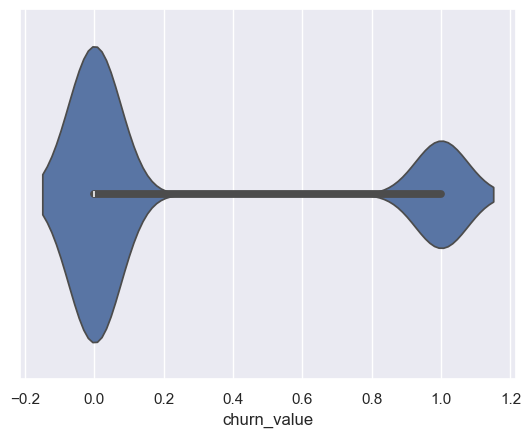

In [991]:
sns.violinplot(customer_churn[categorical_columns], x=customer_churn['churn_value'])

<Axes: xlabel='churn_value'>

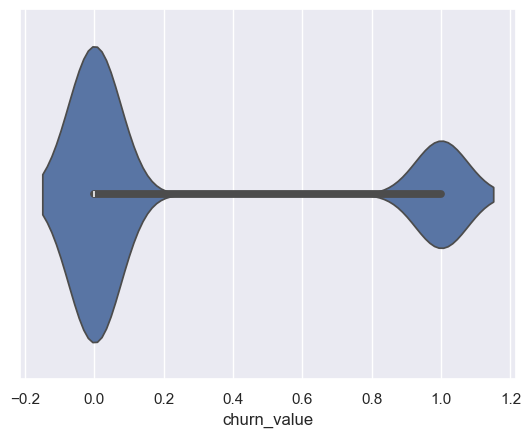

In [992]:
sns.violinplot(customer_churn[categorical_columns], x=customer_churn['churn_value'])

In [993]:
customer_churn[numerical_columns]

,tenure_months,monthly_charges,total_charges,churn_value,churn_score,cltv
0,2,53.85,108.15,1,86,3239
1,2,70.70,151.65,1,67,2701
2,8,99.65,820.50,1,86,5372
3,28,104.80,3046.05,1,84,5003
4,49,103.70,5036.30,1,89,5340
...,...,...,...,...,...,...
7038,72,21.15,1419.40,0,45,5306
7039,24,84.80,1990.50,0,59,2140
7040,72,103.20,7362.90,0,71,5560
7041,11,29.60,346.45,0,59,2793


In [994]:
customer_churn[categorical_columns]

for c in categorical_columns:
    customer_churn[c] = customer_churn[c].str.lower().str.replace(' ', '_')

customer_churn[categorical_columns]
for c in categorical_columns:
    customer_churn[c] = customer_churn[c].str.lower().str.replace('-', '_')

customer_churn[categorical_columns]

,gender,senior_citizen,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method
0,male,no,yes,no,dsl,yes,yes,no,no,no,no,month_to_month,yes,mailed_check
1,female,no,yes,no,fiber_optic,no,no,no,no,no,no,month_to_month,yes,electronic_check
2,female,no,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month_to_month,yes,electronic_check
3,female,no,yes,yes,fiber_optic,no,no,yes,yes,yes,yes,month_to_month,yes,electronic_check
4,male,no,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month_to_month,yes,bank_transfer_(automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,female,no,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,yes,bank_transfer_(automatic)
7039,male,no,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,yes,mailed_check
7040,female,no,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,one_year,yes,credit_card_(automatic)
7041,female,no,no,no_phone_service,dsl,yes,no,no,no,no,no,month_to_month,yes,electronic_check


In [995]:
customer_churn

,gender,senior_citizen,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_value,churn_score,cltv
0,male,no,2,yes,no,dsl,yes,yes,no,no,no,no,month_to_month,yes,mailed_check,53.85,108.15,1,86,3239
1,female,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month_to_month,yes,electronic_check,70.70,151.65,1,67,2701
2,female,no,8,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month_to_month,yes,electronic_check,99.65,820.50,1,86,5372
3,female,no,28,yes,yes,fiber_optic,no,no,yes,yes,yes,yes,month_to_month,yes,electronic_check,104.80,3046.05,1,84,5003
4,male,no,49,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month_to_month,yes,bank_transfer_(automatic),103.70,5036.30,1,89,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,female,no,72,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,yes,bank_transfer_(automatic),21.15,1419.40,0,45,5306
7039,male,no,24,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,0,59,2140
7040,female,no,72,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,0,71,5560
7041,female,no,11,no,no_phone_service,dsl,yes,no,no,no,no,no,month_to_month,yes,electronic_check,29.60,346.45,0,59,2793


### 4.	Feature Engineering:
o	Analyze categorical and numerical features.</br>
o	Encode categorical features appropriately (One-Hot Encoding, Label Encoding).</br>
o	Create new features, if relevant, based on customer behavior (e.g., average usage time, frequency of interactions).</br>
### 5.	Data Transformation:
o	Normalize or scale features (e.g., MinMaxScaler or StandardScaler) to ensure consistent scales for all numeric features.</br>


In [996]:
X = customer_churn.drop('churn_value', axis=1)
y = customer_churn['churn_value']

In [997]:
X.shape, y.shape

((7032, 19), (7032,))

In [998]:
from sklearn.compose import ColumnTransformer

In [999]:
from sklearn.model_selection import train_test_split

In [1000]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1001]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [1002]:
categorical_columns

Index(['gender', 'senior_citizen', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method'],
      dtype='object')

In [1003]:
encoder = OneHotEncoder(drop='first', handle_unknown = 'ignore')

In [1004]:
Xtrain_cat = encoder.fit_transform(X_train[categorical_columns])

In [1005]:
Xtest_cat = encoder.transform(X_test[categorical_columns])

In [1006]:
scaler = StandardScaler()

In [1007]:
numerical_columns = ['tenure_months', 'monthly_charges', 'total_charges', 'churn_score', 'cltv']

In [1008]:
Xtrain_num = scaler.fit_transform(X_train[numerical_columns])

In [1009]:
Xtest_num = scaler.transform(X_test[numerical_columns])

In [1010]:
train_processed = np.hstack((Xtrain_num, Xtrain_cat.toarray()))
test_processed = np.hstack((Xtest_num, Xtest_cat.toarray()))

In [1011]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown = 'ignore'), categorical_columns)
    ]
)

In [1012]:
from sklearn.pipeline import Pipeline

In [1013]:
from sklearn.linear_model import LogisticRegression

### Training the models without Hyper parameter tuning

#### 1. Logistic Regression

In [1085]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

In [1086]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'churn_score', 'cltv']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'senior_citizen', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [1087]:
test_pred = pipeline.predict(X_test)

In [1088]:
test_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1089]:
train_pred = pipeline.predict(X_train)

In [1090]:
train_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [1111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [1112]:
accuracy = accuracy_score(y_train, train_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 92.23%


In [1096]:
accuracy = accuracy_score(y_test, test_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 91.04%


In [1097]:
precision = precision_score(y_train, train_pred)
print(f"Model Precision: {precision * 100:.2f}%")

Model Precision: 85.78%


In [1098]:
precision = precision_score(y_test, test_pred)
print(f"Model Precision: {precision * 100:.2f}%")

Model Precision: 85.12%


In [1099]:
recall = recall_score(y_train, train_pred)
print(f"Model Recall: {recall * 100:.2f}%")

Model Recall: 84.33%


In [1100]:
recall = recall_score(y_test, test_pred)
print(f"Model Recall: {recall * 100:.2f}%")

Model Recall: 82.53%


In [1101]:
f1 = f1_score(y_train, train_pred)
print(f"Model f1 Score: {f1 * 100:.2f}%")

Model f1 Score: 85.05%


In [1102]:
f1 = f1_score(y_test, test_pred)
print(f"Model f1 Score: {f1 * 100:.2f}%")

Model f1 Score: 83.80%


In [1103]:
tn, fp, fn, tp = confusion_matrix(y_train, train_pred).ravel()
specificity = tn / (tn + fp)
print(f"Model specificity Score: {specificity * 100:.2f}%")

Model specificity Score: 95.04%


In [1104]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
specificity = tn / (tn + fp)
print(f"Model specificity Score: {specificity * 100:.2f}%")

Model specificity Score: 94.37%


In [1105]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[955  57]
 [ 69 326]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1012
           1       0.85      0.83      0.84       395

    accuracy                           0.91      1407
   macro avg       0.89      0.88      0.89      1407
weighted avg       0.91      0.91      0.91      1407



#### 2. Decision Tree

In [1135]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier())
])

In [1136]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'churn_score', 'cltv']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'senior_citizen', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier())])

In [1137]:
test_pred = pipeline.predict(X_test)

In [1138]:
train_pred = pipeline.predict(X_train)

In [1139]:
accuracy = accuracy_score(y_test, test_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 90.48%


In [1140]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[945  67]
 [ 67 328]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1012
           1       0.83      0.83      0.83       395

    accuracy                           0.90      1407
   macro avg       0.88      0.88      0.88      1407
weighted avg       0.90      0.90      0.90      1407



#### 3. Random Forest

In [1141]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])

In [1142]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'churn_score', 'cltv']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'senior_citizen', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method'],
      dtype='object'))])),
                ('model', RandomForestClassifier())])

In [1143]:
test_pred = pipeline.predict(X_test)

In [1144]:
train_pred = pipeline.predict(X_train)

In [1145]:
accuracy = accuracy_score(y_test, test_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 92.25%


In [1146]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[965  47]
 [ 62 333]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1012
           1       0.88      0.84      0.86       395

    accuracy                           0.92      1407
   macro avg       0.91      0.90      0.90      1407
weighted avg       0.92      0.92      0.92      1407



#### 4. XGBoost

In [1147]:
from xgboost import XGBClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier())
])

In [1148]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'churn_score', 'cltv']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'senior_citizen', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'te...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [1149]:
train_pred = pipeline.predict(X_train)

In [1150]:
test_pred = pipeline.predict(X_test)

In [1151]:
accuracy = accuracy_score(y_test, test_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 91.68%


In [1152]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[956  56]
 [ 61 334]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1012
           1       0.86      0.85      0.85       395

    accuracy                           0.92      1407
   macro avg       0.90      0.90      0.90      1407
weighted avg       0.92      0.92      0.92      1407



#### 5. Gradient Boost

In [1153]:
from sklearn.ensemble import GradientBoostingClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier())
])

In [1154]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'churn_score', 'cltv']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'senior_citizen', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method'],
      dtype='object'))])),
                ('model', GradientBoostingClassifier())])

In [1155]:
train_pred = pipeline.predict(X_train)

In [1156]:
test_pred = pipeline.predict(X_test)

In [1157]:
accuracy = accuracy_score(y_test, test_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 92.68%


In [1158]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[961  51]
 [ 52 343]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1012
           1       0.87      0.87      0.87       395

    accuracy                           0.93      1407
   macro avg       0.91      0.91      0.91      1407
weighted avg       0.93      0.93      0.93      1407



## 	Hyperparameter Tuning:
o	Tune the models' hyperparameters using GridSearchCV or RandomizedSearchCV to find the best configurations.


# GRID SEARCH

## Using Grid Search CV to determine best fit for hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


def hyperparameter_tuning_test(X, y):
    """
    Function to perform hyperparameter tuning on Logistic Regression, Decision Tree,
    Random Forest, XGBoost and Gradient Boost models.
    """

    from sklearn.model_selection import train_test_split
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Preprocessing setup (from earlier steps)
    # Define transformers for numerical and categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_columns),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
        ]
    )

    # Define model pipelines for Logistic Regression, Decision Tree, Random Forest, XGBoost and Gradient Boost.
    pipelines = {
        'Logistic Regression': Pipeline(steps=[('preprocessor', preprocessor), ('model', LogisticRegression())]),
        'Decision Tree': Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeClassifier())]),
        'Random Forest': Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestClassifier())]),
        'XGBoost': Pipeline(steps=[('preprocessor', preprocessor), ('model', XGBClassifier(eval_metric='logloss'))]),
        'GradBoost': Pipeline(steps=[('preprocessor', preprocessor), ('model', GradientBoostingClassifier(random_state=42))])
    }

    # Hyperparameter grids for different models
    param_grids = {
        'Logistic Regression': {'model__C': [0.01, 0.1, 1, 10, 100], 'model__solver': ['lbfgs','newton-cg','liblinear','sag','saga']},
        'Decision Tree': {'model__max_depth': [3, 5, 10], 'model__min_samples_split': [2, 5, 10, 15]},
        'Random Forest': {'model__n_estimators': [50, 100, 150], 'model__max_depth': [2, 5, 10, 15], 'model__min_samples_split': [2, 5,8, 10]},
        'XGBoost': {'model__n_estimators': [50, 100, 300], 'model__max_depth': [3, 5, 8,10], 'model__learning_rate': [0.01, 0.1, 0.15, 0.2, 0.25, 0.3]},
        'GradBoost': {'model__n_estimators': [50, 100, 300], 'model__max_depth': [3, 5, 8,10], 'model__learning_rate': [0.01, 0.1, 0.15, 0.2, 0.25, 0.3]}
    }

    # Perform hyperparameter tuning for each model and collect results
    best_models = {}
    for model_name, pipeline in pipelines.items():
        grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_models[model_name] = (grid_search.best_estimator_, grid_search.best_score_)

    return best_models


best_models_results = hyperparameter_tuning_test(X_train, y_train)

In [ ]:
best_models_results

### Testing the Grid Search fit result

#### 1. Linear Regression

In [1159]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(C=0.1))
])

In [1160]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'churn_score', 'cltv']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'senior_citizen', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method'],
      dtype='object'))])),
                ('model', LogisticRegression(C=0.1))])

In [1161]:
train_pred = pipeline.predict(X_train)

In [1162]:
test_pred = pipeline.predict(X_test)

In [1163]:
accuracy = accuracy_score(y_test, test_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 91.19%


In [1164]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[957  55]
 [ 69 326]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1012
           1       0.86      0.83      0.84       395

    accuracy                           0.91      1407
   macro avg       0.89      0.89      0.89      1407
weighted avg       0.91      0.91      0.91      1407



#### 2. Decision Tree

In [1165]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(max_depth=5))
])

In [1166]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'churn_score', 'cltv']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'senior_citizen', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier(max_depth=5))])

In [1167]:
train_pred = pipeline.predict(X_train)

In [1168]:
test_pred = pipeline.predict(X_test)

In [1169]:
accuracy = accuracy_score(y_test, test_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 92.04%


In [1170]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[937  75]
 [ 37 358]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1012
           1       0.83      0.91      0.86       395

    accuracy                           0.92      1407
   macro avg       0.89      0.92      0.90      1407
weighted avg       0.92      0.92      0.92      1407



### 3. Randon Forest

In [1171]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('model', RandomForestClassifier(max_depth=30,  max_features=7,n_estimators=100,min_samples_split=15))
    ('model', RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50))
])

In [1172]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'churn_score', 'cltv']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'senior_citizen', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=10, min_samples_split=10,
                                        n_estimators=50))])

In [1173]:
test_pred = pipeline.predict(X_test)

In [1174]:
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1175]:
train_pred = pipeline.predict(X_train)

In [1176]:
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1177]:
accuracy = accuracy_score(y_train, train_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 95.25%


In [1178]:
accuracy = accuracy_score(y_test, test_pred) #testing accuracy of the model
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 92.82%


In [1179]:
precision = precision_score(y_train, train_pred)
print(f"Model Precision: {precision * 100:.2f}%")

Model Precision: 91.53%


In [1180]:
precision = precision_score(y_test, test_pred)
print(f"Model Precision: {precision * 100:.2f}%")

Model Precision: 88.08%


In [1181]:
recall = recall_score(y_train, train_pred)
print(f"Model Recall: {recall * 100:.2f}%")

Model Recall: 90.23%


In [1182]:
recall = recall_score(y_test, test_pred)
print(f"Model Recall: {recall * 100:.2f}%")

Model Recall: 86.08%


In [1183]:
f1 = f1_score(y_train, train_pred)
print(f"Model f1 Score: {f1 * 100:.2f}%")

Model f1 Score: 90.88%


In [1184]:
f1 = f1_score(y_test, test_pred)
print(f"Model f1 Score: {f1 * 100:.2f}%")

Model f1 Score: 87.07%


In [1185]:
tn, fp, fn, tp = confusion_matrix(y_train, train_pred).ravel()
specificity = tn / (tn + fp)
print(f"Model specificity Score: {specificity * 100:.2f}%")

Model specificity Score: 97.04%


In [1186]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
specificity = tn / (tn + fp)
print(f"Model specificity Score: {specificity * 100:.2f}%")

Model specificity Score: 95.45%


In [1187]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[966  46]
 [ 55 340]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1012
           1       0.88      0.86      0.87       395

    accuracy                           0.93      1407
   macro avg       0.91      0.91      0.91      1407
weighted avg       0.93      0.93      0.93      1407



#### 4. XGBoost

####  5.  Gradient Boost.

In [1052]:
#hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [1053]:
# param_grid = {
#     'model__C': [0.01, 0.1, 1, 10, 100],
#     'model__solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
#     'model__max_iter'  : [100,1000,2500,3000,5000]
# }

In [1054]:
# Ignore for now
# param_grid = [
#     {'penalty':['l1','l2','elasticnet','none'],
#     'pipeline__C': np.logspace(-4,4,20),
#     'pipeline__solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
#     'pipeline__max_iter'  : [100,1000,2500,3000,5000]
# }
# ]

In [1055]:
# from sklearn.model_selection import GridSearchCV
# clf = GridSearchCV(pipeline,param_grid = param_grid, cv = 5, scoring='accuracy', verbose=True,n_jobs=-1)
# clf

In [1056]:
    # Ignore for now
    # # Set up the hyperparameter grid for logistic regression
    # param_grid = {
    #     'model__C': [0.1, 1.0, 10.0],
    #     'model__solver': ['liblinear', 'lbfgs']
    # }

    # # GridSearchCV for hyperparameter tuning
    # clf = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

    # # Try fitting the model with hyperparameter tuning
    # try:
    #     best_clf = clf.fit(X, y)
    #     return best_clf.best_estimator_, best_clf.best_score_
    # except Exception as e:
    #     return str(e)

In [1057]:
# best_clf = clf.fit(X_train, y_train)
# best_clf.best_estimator_

In [1058]:
# print(f'Accuracy : {best_clf.score(X_train,y_train):.3f}') 

In [1059]:
# print(f'Best Score : {best_clf.best_score_}')

In [1060]:
# print(f'Best Estimator :{best_clf.best_estimator_}')

In [1061]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def hyperparameter_tuning_with_real_data(X, y):
    """
    Function to perform hyperparameter tuning on Logistic Regression, Decision Tree,
    Random Forest, and XGBoost models using the provided dataset.
    """
    from sklearn.model_selection import train_test_split
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # # Preprocessing setup (reuse from earlier configuration)
    # numerical_features = ['tenure_months', 'monthly_charges', 'total_charges', 'churn_score', 'cltv']
    # categorical_features = ['gender', 'senior_citizen', 'phone_service', 'multiple_lines',
    #                         'internet_service', 'online_security', 'online_backup',
    #                         'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
    #                         'contract', 'paperless_billing', 'payment_method']

    # Define transformers for numerical and categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_columns),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
        ]
    )

    # Define model pipelines for Logistic Regression, Decision Tree, Random Forest, and XGBoost
    pipelines = {
        'Logistic Regression': Pipeline(steps=[('preprocessor', preprocessor), ('model', LogisticRegression())]),
        'Decision Tree': Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeClassifier())]),
        'Random Forest': Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestClassifier())]),
        'XGBoost': Pipeline(steps=[('preprocessor', preprocessor), ('model', XGBClassifier(eval_metric='logloss'))])
    }

    # Hyperparameter grids for different models
    param_grids = {
        'Logistic Regression': {'model__C': [0.01, 0.1, 1, 10, 100], 'model__solver': ['lbfgs','newton-cg','liblinear','sag','saga']},
        'Decision Tree': {'model__max_depth': [3, 5, 10], 'model__min_samples_split': [2, 5, 10, 15]},
        'Random Forest': {'model__n_estimators': [50, 100, 150], 'model__max_depth': [2, 5, 10, 15], 'model__min_samples_split': [2, 5,8, 10]},
        'XGBoost': {'model__n_estimators': [50, 100, 300], 'model__max_depth': [3, 5, 8,10], 'model__learning_rate': [0.01, 0.1, 0.15, 0.2, 0.25, 0.3]}
    }

    # Perform hyperparameter tuning for each model and collect results
    best_models = {}
    for model_name, pipeline in pipelines.items():
        grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_models[model_name] = (grid_search.best_estimator_, grid_search.best_score_)

    return best_models

# The function can now be called using the actual dataset from the notebook for hyperparameter tuning.
# This call requires the real dataset loaded in the previous cells, e.g., X_real, y_real.
# Uncomment the following line to use with real data:
best_models_results = hyperparameter_tuning_with_real_data(X_train, y_train)


c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

In [1062]:
best_models_results

{'Logistic Regression': (Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('num', StandardScaler(),
                                                    ['tenure_months',
                                                     'monthly_charges',
                                                     'total_charges',
                                                     'churn_score', 'cltv']),
                                                   ('cat',
                                                    OneHotEncoder(handle_unknown='ignore'),
                                                    Index(['gender', 'senior_citizen', 'phone_service', 'multiple_lines',
         'internet_service', 'online_security', 'online_backup',
         'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
         'contract', 'paperless_billing', 'payment_method'],
        dtype='object'))])),
                  ('model', LogisticRegression(C=0.1))]),
  0.920

In [1063]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def hyperparameter_tuning_with_real_data(X, y):
    """
    Function to perform hyperparameter tuning on Logistic Regression, Decision Tree,
    Random Forest, and XGBoost models using the provided dataset.
    """
    from sklearn.model_selection import train_test_split
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # # Preprocessing setup (reuse from earlier configuration)
    # numerical_features = ['tenure_months', 'monthly_charges', 'total_charges', 'churn_score', 'cltv']
    # categorical_features = ['gender', 'senior_citizen', 'phone_service', 'multiple_lines',
    #                         'internet_service', 'online_security', 'online_backup',
    #                         'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
    #                         'contract', 'paperless_billing', 'payment_method']

    # Define transformers for numerical and categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_columns),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
        ]
    )

    # Define model pipelines for Logistic Regression, Decision Tree, Random Forest, and XGBoost
    pipelines = {
        'Logistic Regression': Pipeline(steps=[('preprocessor', preprocessor), ('model', LogisticRegression())]),
        'Decision Tree': Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeClassifier())]),
        'Random Forest': Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestClassifier())]),
        'XGBoost': Pipeline(steps=[('preprocessor', preprocessor), ('model', XGBClassifier(eval_metric='logloss'))])
    }

    # Hyperparameter grids for different models
    param_grids = {
        'Logistic Regression': {'model__C': [0.01, 0.1, 1, 10, 100], 'model__solver': ['lbfgs','newton-cg','liblinear','sag','saga']},
        'Decision Tree': {'model__max_depth': [3, 5, 10], 'model__min_samples_split': [2, 5, 10, 15]},
        'Random Forest': {'model__n_estimators': [50, 100], 'model__max_depth': [5, 10, 15], 'model__min_samples_split': [2, 5, 10]},
        'XGBoost': {'model__n_estimators': [50, 100, 300], 'model__max_depth': [3, 5, 8], 'model__learning_rate': [0.01, 0.1, 0.15, 0.2, 0.25]}
    }

    # Perform hyperparameter tuning for each model and collect results
    best_models = {}
    for model_name, pipeline in pipelines.items():
        grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_models[model_name] = (grid_search.best_estimator_, grid_search.best_score_)

    return best_models

# The function can now be called using the actual dataset from the notebook for hyperparameter tuning.
# This call requires the real dataset loaded in the previous cells, e.g., X_real, y_real.
# Uncomment the following line to use with real data:
best_models_results = hyperparameter_tuning_with_real_data(X_train, y_train)


c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

In [1064]:
best_models_results

{'Logistic Regression': (Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('num', StandardScaler(),
                                                    ['tenure_months',
                                                     'monthly_charges',
                                                     'total_charges',
                                                     'churn_score', 'cltv']),
                                                   ('cat',
                                                    OneHotEncoder(handle_unknown='ignore'),
                                                    Index(['gender', 'senior_citizen', 'phone_service', 'multiple_lines',
         'internet_service', 'online_security', 'online_backup',
         'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
         'contract', 'paperless_billing', 'payment_method'],
        dtype='object'))])),
                  ('model', LogisticRegression(C=0.1))]),
  0.920

In [1065]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

def hyperparameter_tuning_with_real_data(X, y):
    """
    Function to perform hyperparameter tuning on Logistic Regression, Decision Tree,
    Random Forest, and XGBoost models using the provided dataset.
    """
    from sklearn.model_selection import train_test_split
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # # Preprocessing setup (reuse from earlier configuration)
    # numerical_features = ['tenure_months', 'monthly_charges', 'total_charges', 'churn_score', 'cltv']
    # categorical_features = ['gender', 'senior_citizen', 'phone_service', 'multiple_lines',
    #                         'internet_service', 'online_security', 'online_backup',
    #                         'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
    #                         'contract', 'paperless_billing', 'payment_method']

    # Define transformers for numerical and categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_columns),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
        ]
    )

    # Define model pipelines for Logistic Regression, Decision Tree, Random Forest, and XGBoost
    pipelines = {
        'Logistic Regression': Pipeline(steps=[('preprocessor', preprocessor), ('model', LogisticRegression())]),
        'Decision Tree': Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeClassifier())]),
        'Random Forest': Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestClassifier())]),
        'XGBoost': Pipeline(steps=[('preprocessor', preprocessor), ('model', XGBClassifier(eval_metric='logloss'))]),
        'GradBoost': Pipeline(steps=[('preprocessor', preprocessor), ('model', GradientBoostingClassifier(random_state=42))])
    }

    # Hyperparameter grids for different models
    param_grids = {
        'Logistic Regression': {'model__C': [0.01, 0.1, 1, 10, 100], 'model__solver': ['lbfgs','newton-cg','liblinear','sag','saga']},
        'Decision Tree': {'model__max_depth': [3, 5, 10], 'model__min_samples_split': [2, 5, 10, 15]},
        'Random Forest': {'model__n_estimators': [50, 100, 150], 'model__max_depth': [2, 5, 10, 15], 'model__min_samples_split': [2, 5,8, 10]},
        'XGBoost': {'model__n_estimators': [50, 100, 300], 'model__max_depth': [3, 5, 8,10], 'model__learning_rate': [0.01, 0.1, 0.15, 0.2, 0.25, 0.3]},
        'GradBoost': {'model__n_estimators': [50, 100, 300], 'model__max_depth': [3, 5, 8,10], 'model__learning_rate': [0.01, 0.1, 0.15, 0.2, 0.25, 0.3]}
    }

    # Perform hyperparameter tuning for each model and collect results
    best_models = {}
    for model_name, pipeline in pipelines.items():
        grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_models[model_name] = (grid_search.best_estimator_, grid_search.best_score_)

    return best_models

# The function can now be called using the actual dataset from the notebook for hyperparameter tuning.
# This call requires the real dataset loaded in the previous cells, e.g., X_real, y_real.
# Uncomment the following line to use with real data:
best_models_results = hyperparameter_tuning_with_real_data(X_train, y_train)


c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

In [1066]:
best_models_results

{'Logistic Regression': (Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('num', StandardScaler(),
                                                    ['tenure_months',
                                                     'monthly_charges',
                                                     'total_charges',
                                                     'churn_score', 'cltv']),
                                                   ('cat',
                                                    OneHotEncoder(handle_unknown='ignore'),
                                                    Index(['gender', 'senior_citizen', 'phone_service', 'multiple_lines',
         'internet_service', 'online_security', 'online_backup',
         'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
         'contract', 'paperless_billing', 'payment_method'],
        dtype='object'))])),
                  ('model', LogisticRegression(C=0.1))]),
  0.920

###	Cross-Validation:
	Apply cross-validation (k-fold) to ensure the model generalizes well to unseen data.

In [1071]:
from sklearn.model_selection import KFold, cross_val_score

In [1072]:
kf = KFold(n_splits=10, shuffle=True)#, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 6328, Test set:704
Fold:2, Train set: 6328, Test set:704
Fold:3, Train set: 6329, Test set:703
Fold:4, Train set: 6329, Test set:703
Fold:5, Train set: 6329, Test set:703
Fold:6, Train set: 6329, Test set:703
Fold:7, Train set: 6329, Test set:703
Fold:8, Train set: 6329, Test set:703
Fold:9, Train set: 6329, Test set:703
Fold:10, Train set: 6329, Test set:703


In [1073]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(C=0.1))
])

In [1074]:
score = cross_val_score(pipeline, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.3f}".format(score.mean())}')

Scores for each fold are: [0.92471591 0.90909091 0.92176387 0.93314367 0.92460882 0.93314367
 0.89615932 0.93029872 0.90327169 0.91322902]
Average score: 0.919


In [1075]:
algorithms = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for algo in algorithms:
    score = cross_val_score(pipeline, X, y, cv= kf, scoring="accuracy")
    print(f'Average score({algo}): {"{:.3f}".format(score.mean())}')

Average score(newton-cg): 0.920
Average score(lbfgs): 0.919
Average score(liblinear): 0.920
Average score(sag): 0.918
Average score(saga): 0.919


In [1076]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('model', RandomForestClassifier(max_depth=30,  max_features=7,n_estimators=100,min_samples_split=15))
    ('model', RandomForestClassifier(max_depth=10, n_estimators=50))
])

In [1077]:
score = cross_val_score(pipeline, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.3f}".format(score.mean())}')

Scores for each fold are: [0.93181818 0.93892045 0.93029872 0.94025605 0.91607397 0.92460882
 0.92176387 0.93883357 0.90611664 0.94167852]
Average score: 0.929


In [1078]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('model', RandomForestClassifier(max_depth=30,  max_features=7,n_estimators=100,min_samples_split=15))
    ('model', DecisionTreeClassifier(max_depth=5))
])

In [1079]:
score = cross_val_score(pipeline, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.3f}".format(score.mean())}')

Scores for each fold are: [0.92045455 0.89630682 0.91607397 0.92745377 0.92460882 0.92603129
 0.91465149 0.91465149 0.93883357 0.943101  ]
Average score: 0.922


In [1080]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(pipeline, X, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(1): 0.926
Average score(2): 0.926
Average score(3): 0.919
Average score(4): 0.923
Average score(5): 0.926
Average score(6): 0.926
Average score(7): 0.925
Average score(8): 0.926
Average score(9): 0.923
Average score(10): 0.926


In [1081]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('model', RandomForestClassifier(max_depth=30,  max_features=7,n_estimators=100,min_samples_split=15))
    ('model', GradientBoostingClassifier(learning_rate=0.25, n_estimators=50,random_state=42))
])

In [1082]:
score = cross_val_score(pipeline, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.3f}".format(score.mean())}')

Scores for each fold are: [0.93465909 0.92897727 0.93883357 0.92034139 0.91607397 0.91322902
 0.94167852 0.93456615 0.92745377 0.95732575]
Average score: 0.931


In [1083]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(eval_metric='logloss', learning_rate=0.2,  max_depth=3,  n_estimators=50))
    # ('model', RandomForestClassifier(max_depth=30,  max_features=7,n_estimators=100,min_samples_split=15))
    # ('model', GradientBoostingClassifier(learning_rate=0.25, n_estimators=50,random_state=42))
])

In [1084]:
score = cross_val_score(pipeline, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.3f}".format(score.mean())}')

Scores for each fold are: [0.95738636 0.94034091 0.93456615 0.94736842 0.94025605 0.92176387
 0.93598862 0.943101   0.91322902 0.92034139]
Average score: 0.935


In [889]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier

# def hyperparameter_tuning_with_real_data(X, y):
#     """
#     Function to perform hyperparameter tuning on Logistic Regression, Decision Tree,
#     Random Forest, and XGBoost models using the provided dataset.
#     """
#     from sklearn.model_selection import train_test_split
    
#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
#     # # Preprocessing setup (reuse from earlier configuration)
#     # numerical_features = ['tenure_months', 'monthly_charges', 'total_charges', 'churn_score', 'cltv']
#     # categorical_features = ['gender', 'senior_citizen', 'phone_service', 'multiple_lines',
#     #                         'internet_service', 'online_security', 'online_backup',
#     #                         'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
#     #                         'contract', 'paperless_billing', 'payment_method']

#     # Define transformers for numerical and categorical features
#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('num', StandardScaler(), numerical_columns),
#             ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
#         ]
#     )

#     # Define model pipelines for Logistic Regression, Decision Tree, Random Forest, and XGBoost
#     pipelines = {
#         'Logistic Regression': Pipeline(steps=[('preprocessor', preprocessor), ('model', LogisticRegression())]),
#         'Decision Tree': Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeClassifier())]),
#         'Random Forest': Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestClassifier())]),
#         'GradBoost': Pipeline(steps=[('preprocessor', preprocessor), ('model', GradientBoostingClassifier(random_state=42))]),
#         'XGBoost': Pipeline(steps=[('preprocessor', preprocessor), ('model', XGBClassifier(eval_metric='logloss'))])
#     }

#     # Hyperparameter grids for different models
#     param_grids = {
#         'Logistic Regression': {'model__C': [0.01, 0.1, 1, 10, 100], 'model__solver': ['lbfgs','newton-cg','liblinear','sag','saga']},
#         'Decision Tree': {'model__max_depth': [3, 5, 10], 'model__min_samples_split': [2, 5, 10, 15]},
#         'Random Forest': {'model__n_estimators': [50, 100, 150], 'model__max_depth': [2, 5, 10, 15], 'model__min_samples_split': [2, 5,8, 10]},
#         'GradBoost': {'model__n_estimators': [50, 100, 300], 'model__max_depth': [3, 5, 8,10], 'model__learning_rate': [0.01, 0.1, 0.15, 0.2, 0.25, 0.3]},
#         'XGBoost': {'model__n_estimators': [50, 100, 300], 'model__max_depth': [3, 5, 8,10], 'model__learning_rate': [0.01, 0.1, 0.15, 0.2, 0.25, 0.3]}
#     }

#     # Perform hyperparameter tuning for each model and collect results
#     best_models = {}
#     for model_name, pipeline in pipelines.items():
#         grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy')
#         grid_search.fit(X_train, y_train)
#         best_models[model_name] = (grid_search.best_estimator_, grid_search.best_score_)

#     return best_models

# # The function can now be called using the actual dataset from the notebook for hyperparameter tuning.
# # This call requires the real dataset loaded in the previous cells, e.g., X_real, y_real.
# # Uncomment the following line to use with real data:
# best_models_results = hyperparameter_tuning_with_real_data(X_train, y_train)

c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ayojo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

In [890]:
# best_models_results

{'Logistic Regression': (Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('num', StandardScaler(),
                                                    ['tenure_months',
                                                     'monthly_charges',
                                                     'total_charges',
                                                     'churn_score', 'cltv']),
                                                   ('cat',
                                                    OneHotEncoder(handle_unknown='ignore'),
                                                    Index(['gender', 'senior_citizen', 'phone_service', 'multiple_lines',
         'internet_service', 'online_security', 'online_backup',
         'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
         'contract', 'paperless_billing', 'payment_method'],
        dtype='object'))])),
                  ('model', LogisticRegression(C=0.1))]),
  0.920

### 3.	Customer Insights:
	Analyze the top features that influence customer churn (e.g., service usage patterns, contract type, payment methods).
	Provide actionable insights that the business can implement to reduce churn (e.g., personalized offers for at-risk customers).


In [927]:
test_churn = pd.read_excel('Telco_customer_churn.xlsx')

In [931]:
test_churn.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [936]:
test_churn['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

In [932]:
test_churn['Payment Method'].value_counts()

Payment Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [933]:
test_churn['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [934]:
test_churn['Internet Service'].value_counts()

Internet Service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

### Actionable Insights

	Churn reason states that customers churn due to poor customer service and better coetitor offers
	To reduce churn,services such as customer support, better internet offers needs to be reduced
